# syHEP code for $ee-h-\chi\chi$ (s-channel) amplitude and total cross-section

In [102]:
#!python -m pip install -r ../requirements.txt

- Auxiliary Functions

In [103]:
import sympy as sy

import sys,os
sys.path.append('..')
import syHEP.src.syhep as hep

from syHEP.src.syhep.extras import Amplitude_schannel

from app.modules.functions import find_symbol, get_py_src

# Steps for SYMPY calculation

Process: $\nu_e(p_1)+\bar \nu_e(p_2)\to S(q) \to W^-_0(k_1)+W^+_0(k_2)$

### Symbols, vectors and constants


In [104]:
## latex symbols doesn't need "$" 
theta, r = sy.symbols('theta r', positive=True)

s, t, u, p, s0, t0, u0, phi, P, Gamma = sy.symbols('s t u p s_0 t_0 u_0 phi P Gamma', real=True, positive=True)

# Masses
EN, Mmed, MS, mf, mi, m1, m2, m3, m4 = sy.symbols(r'EN M_{med} M_{S} m_{f} m_{i} m_1 m_2 m_3 m_4', real=True, positive=True, zero=False)

# Electroweak constants
cv, ca, gz, gw, thetaw, gs_theta, gw_theta = sy.symbols(r'c_v c_a g_Z g_W theta_W g_S_theta g_W_theta', real=True, positive=True,)


In [105]:
# From kinematics, for a 2 -> 2 process with a mediator, we have
# 2 -> 2 process, p1, p2 -> q -> k1, k2
p1 = sy.Matrix([sy.sqrt(s)/2, 0,  0,           0])
p2 = sy.Matrix([sy.sqrt(s)/2, 0,  sy.pi,       sy.pi])
k1 = sy.Matrix([sy.sqrt(s)/2, mf, theta,       0])
k2 = sy.Matrix([sy.sqrt(s)/2, mf, sy.pi-theta, sy.pi])

## Show the objects we just created
display(k1)
display(k2)
display(p1)
display(p2)


Matrix([
[sqrt(s)/2],
[    m_{f}],
[    theta],
[        0]])

Matrix([
[ sqrt(s)/2],
[     m_{f}],
[pi - theta],
[        pi]])

Matrix([
[sqrt(s)/2],
[        0],
[        0],
[        0]])

Matrix([
[sqrt(s)/2],
[        0],
[       pi],
[       pi]])

### Premisses

According to the examples of Prof. Berger, we can define two currents and obtain the corresponding amplitude through the dot product between the two, without the need for any tricks, averages, or trace properties of gamma matrices.
Furthermore, the propagators are already included in the currents, so just multiply "one side by the other" of the diagram to obtain the corresponding amplitude.

The amplitude for the process we are interested in can be written according to the equation below, taken from the Quigg book.

Where the full form of the S scalar propagator, is given by

$$\frac{i}{q^2 - M_{S}^2}$$


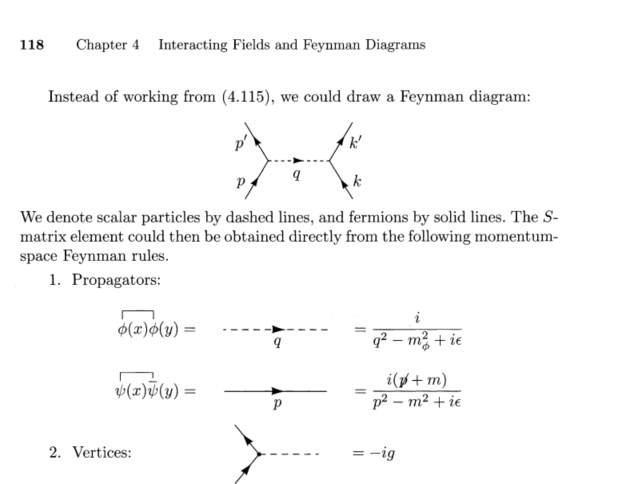

## Mandelstam kinematics

In [106]:
## s, t, u definition

fp1 = hep.fourvec(p1)
fp2 = hep.fourvec(p2)
fk1 = hep.fourvec(k1)
fk2 = hep.fourvec(k2)

sm = hep.dotprod4(fp1 + fp2, fp1 + fp2)
tm = hep.dotprod4(fp1 - fk1, fp1 - fk1)
um = hep.dotprod4(fp1 - fk2, fp1 - fk2)


q_med = fp1 + fp2

## Force the symbols to be the same
mmed = Mmed

display(f'Mandelstam s:', sm)
display(f'Mandelstam t:', tm)
display(f'Mandelstam u:', um)

'Mandelstam s:'

s

'Mandelstam t:'

m_{f}**2 + sqrt(s)*sqrt(-4*m_{f}**2 + s)*cos(theta)/2 - s/2

'Mandelstam u:'

m_{f}**2 - sqrt(s)*sqrt(-4*m_{f}**2 + s)*cos(theta)/2 - s/2

In [107]:
# ## Here we make some substitutions based on the Mandelstam variables kinematics 

# sCM = 4*EN**2

# tCM = mi**2 + mf**2 - 2*EN**2 + 2*sqrt(EN**2 - mi**2) * sqrt(EN**2-mf**2) * cos(theta)
# tCM = tCM.subs(EN, sqrt(s)/2).subs(sqrt(s - 4*mf**2), xi).subs(sqrt(s - Mmed**2), xi)

# # t0CM= tCM - m**2 - MW**2

# cost = solve(tm - t, cos(theta))
# cost = simplify(cost[0])  #.subs(sqrt(s - 4*MW**2), xi)

# cost_xi = simplify(cost).subs(sqrt(s - 4*mf**2), xi)
# xi_t = solve(cost_xi - cos(theta), xi)[0]

# xi, xi_t, cost, cost_xi


## Ampsquared $| \mathcal M |^2$ evaluation

In [108]:
## Get the terms to be summed in the final expression
tems_func = Amplitude_schannel('vbar', p1, 'u', p2, 'scalar', 'ubar', k1, 'v', k2)

# Display no null the terms
for expr in tems_func:
    if expr != 0:
        display(expr)

2*sqrt(s)*(g_ps\psi + I*g_s\psi)*(g_ps\chi*sqrt(s) - I*g_s\chi*sqrt(-2*m_{f} + sqrt(s))*sqrt(2*m_{f} + sqrt(s)))/(I*Gamma*M_{med} - M_{med}**2 + s)

-2*sqrt(s)*(g_ps\psi + I*g_s\psi)*(g_ps\chi*sqrt(s) + I*g_s\chi*sqrt(-2*m_{f} + sqrt(s))*sqrt(2*m_{f} + sqrt(s)))/(I*Gamma*M_{med} - M_{med}**2 + s)

-2*sqrt(s)*(g_ps\psi - I*g_s\psi)*(g_ps\chi*sqrt(s) - I*g_s\chi*sqrt(-2*m_{f} + sqrt(s))*sqrt(2*m_{f} + sqrt(s)))/(I*Gamma*M_{med} - M_{med}**2 + s)

2*sqrt(s)*(g_ps\psi - I*g_s\psi)*(g_ps\chi*sqrt(s) + I*g_s\chi*sqrt(-2*m_{f} + sqrt(s))*sqrt(2*m_{f} + sqrt(s)))/(I*Gamma*M_{med} - M_{med}**2 + s)

In [109]:

def get_amp_squared(terms: list):
    '''This function will generate an expression for the amplitude squared of the scattering, i.e., |M|² 
    It'll be summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
    Args:
        terms: a list of the terms of the squared amplitude  

    Returns:
        Amplitude square of the scattering
    '''

    # Define Some auxiliar variables
    beta, xi = sy.symbols(r'beta xi', real=True, positive=True)
    
    sum_terms = 0

    for T in terms:
        s = find_symbol(T, r's')
        mf = find_symbol(T, r'm_{f}')

        
        res = T.subs(sy.sqrt(s - 4*mf**2), xi).subs(sy.sqrt(sy.sqrt(s) - 2*mf), beta)
        sum_terms +=  res * sy.conjugate(res) ## Summing Squared

    # Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
    squared_result = sum_terms / 4 # Averaging over the incoming helicities
    
    # get back to the original form
    squared_result = sy.nsimplify(sy.expand(squared_result)).subs(xi, sy.sqrt(s - 4*mf**2)).subs(beta, sy.sqrt(sy.sqrt(s) - 2*mf))  ## simplify

    # last simplification
    amp_squared = sy.simplify(squared_result)
    amp_squared = sy.collect(sy.collect(amp_squared, s), mf)

    return sy.simplify(amp_squared)

## $\frac{d \sigma}{dt}$ expression

In [110]:
## Gives the dsig_dt expression and the total x sec integrated (in t) cross section

def dsig_dt(amp_squared: sy.Expr):
    '''Gives the dsig_dt expression and the total x sec integrated (in t) cross section'''

    # Golden factor:  16\pi(s-m^2)^2
    prefactor = 16*sy.pi*(s-mi**2)**2
    prefactor = prefactor.subs(mi, 0)

    dsig_dt =  amp_squared / prefactor

    ## Integration limits in function of t
    tUpper = (1/2) * (2*mi**2 + 2*mf**2 - s + sy.sqrt((s - 4*mi**2)*(s - 4*mf**2)))
    tLower = (1/2) * (2*mi**2 + 2*mf**2 - s - sy.sqrt((s - 4*mi**2)*(s - 4*mf**2)))

    tlower = sy.together(sy.nsimplify(tLower.subs(mi, 0))) 
    tupper = sy.together(sy.nsimplify(tUpper.subs(mi, 0))) 

    totalxsec = 2*sy.pi * sy.integrate(dsig_dt, (t, tlower, tupper))
    totalxsec = sy.simplify(totalxsec)


    return dsig_dt, totalxsec


## Scalar Mediator - $s$-channel

Evaluates the total cross section of the process 


$$\sigma(\ell \ell \to h \to \chi \chi)$$

Where $\ell$ is a SM lepton, $h$ is a new (pseudo)scalar mediator, and $\chi$ is the DM final state

In [111]:
# Dict to store the final results
total_xsec_dict = {}
dsig_dt_dict = {}

### Scalar DM

In [112]:
## Get the terms to be summed in the final expression
tems_func = Amplitude_schannel('vbar', p1, 'u', p2, 'scalar', 'phibar', k1, 'phi', k2)
ampsq = get_amp_squared(tems_func)

dsig_dt_dict['scalar'], total_xsec_dict['scalar'] = dsig_dt(ampsq)

total_xsec_dict['scalar'] = sy.simplify(total_xsec_dict['scalar'])
total_xsec_dict['scalar']

16*g_s\chi**2*(g_ps\psi**2 + g_s\psi**2)*sqrt(-4*m_{f}**2 + s)/(sqrt(s)*(Gamma**2*M_{med}**2 + M_{med}**4 - 2*M_{med}**2*s + s**2))

### Fermion DM

In [113]:
tems_func = Amplitude_schannel('vbar', p1, 'u', p2, 'scalar', 'ubar', k1, 'v', k2)
ampsq = get_amp_squared(tems_func)

dsig_dt_dict['fermion'], total_xsec_dict['fermion'] = dsig_dt(ampsq)
total_xsec_dict['fermion'] = sy.simplify(total_xsec_dict['fermion'])
total_xsec_dict['fermion']

sqrt(-4*m_{f}**2 + s)*(-4*g_s\chi**2*m_{f}**2*(g_ps\psi**2 + g_s\psi**2) + s*(g_ps\chi**2*g_ps\psi**2 + g_ps\chi**2*g_s\psi**2 + g_ps\psi**2*g_s\chi**2 + g_s\chi**2*g_s\psi**2))/(2*sqrt(s)*(Gamma**2*M_{med}**2 + M_{med}**4 - 2*M_{med}**2*s + s**2))

### Vector DM


In [114]:
tems_func = Amplitude_schannel('vbar', p1, 'u', p2, 'scalar', 'polbar', k1, 'pol', k2)
ampsq = get_amp_squared(tems_func)

dsig_dt_dict['vector'], total_xsec_dict['vector'] = dsig_dt(ampsq)
total_xsec_dict['vector'] = sy.simplify(total_xsec_dict['vector'])
total_xsec_dict['vector']

3*g_s\chi**2*(g_ps\psi**2 + g_s\psi**2)*sqrt(-4*m_{f}**2 + s)/(4*sqrt(s)*(Gamma**2*M_{med}**2 + M_{med}**4 - 2*M_{med}**2*s + s**2))

# Plots

## Extract the function in python source

In [115]:

dm_types_list = ['scalar', 'fermion', 'vector']

for dm_type, expression in total_xsec_dict.items():
    print(get_py_src(expression, f'{dm_type}_DM_scalar_med'))


def scalar_DM_scalar_med(g_s_psi, m_f, Gamma, M_med, g_ps_psi, g_s_chi, s):
    return 16*g_s_chi**2*(g_ps_psi**2 + g_s_psi**2)*np.sqrt(-4*m_f**2 + s)/(np.sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))

def fermion_DM_scalar_med(g_s_psi, m_f, Gamma, g_ps_psi, g_ps_chi, g_s_chi, s, M_med):
    return (1/2)*np.sqrt(-4*m_f**2 + s)*(-4*g_s_chi**2*m_f**2*(g_ps_psi**2 + g_s_psi**2) + s*(g_ps_chi**2*g_ps_psi**2 + g_ps_chi**2*g_s_psi**2 + g_ps_psi**2*g_s_chi**2 + g_s_chi**2*g_s_psi**2))/(np.sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))

def vector_DM_scalar_med(g_s_psi, m_f, Gamma, M_med, g_ps_psi, g_s_chi, s):
    return (3/4)*g_s_chi**2*(g_ps_psi**2 + g_s_psi**2)*np.sqrt(-4*m_f**2 + s)/(np.sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))



## Define python functions 

For the decays and cross-sections from the scalar mediator

In [116]:
# ↑ Copy from the last output and do some tweaks

import numpy as np


@np.vectorize
def gamma_scalar(g_s_psi, m_f, M_med):
    return g_s_psi**2*np.sqrt(1 - 4*m_f**2/M_med**2)/(np.pi*M_med)

@np.vectorize
def gamma_fermion(g_s_psi, m_f, M_med):
    return (1/16)*g_s_psi**2*np.sqrt(1 - 4*m_f**2/M_med**2)*(M_med**2 - 4*m_f**2)/(np.pi*M_med)

@np.vectorize
def gamma_vector(g_s_psi, m_f, M_med):
    return (1/64)*g_s_psi**2*np.sqrt(1 - 4*m_f**2/M_med**2)*(M_med**4 - 8*M_med**2*m_f**2 + 16*m_f**4)/(np.pi*M_med*m_f**4)


gamma_func_dict = {'scalar': gamma_scalar,
                   'fermion': gamma_fermion,
                   'vector': gamma_vector,
}
## 

@np.vectorize
def scalar_DM_scalar_med(M_med, g_ps_psi, g_ps_chi, s, g_s_chi, g_s_psi, m_f, Gamma_func):
    
    g_ps_psi = g_s_psi # Equal couplings for scalar and pseudo-scalar mediators
    g_ps_chi = g_s_chi # Equal couplings for scalar and pseudo-scalar mediators
    Bi = Gamma_func(g_ps_psi, m_f, M_med) # Initial states branching ratio
    Bf = Gamma_func(g_ps_chi, m_f, M_med) # Final states branching ratio
    Gamma = Bi + Bf

    return 16*g_s_chi**2*(g_ps_psi**2 + g_s_psi**2)*np.sqrt(-4*m_f**2 + s)/(np.sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))

@np.vectorize
def fermion_DM_scalar_med(M_med, g_ps_psi, g_ps_chi, s, g_s_chi, g_s_psi, m_f, Gamma_func):
    
    g_ps_psi = g_s_psi # Equal couplings for scalar and pseudo-scalar mediators
    g_ps_chi = g_s_chi # Equal couplings for scalar and pseudo-scalar mediators
    Bi = Gamma_func(g_ps_psi, m_f, M_med) # Initial states branching ratio
    Bf = Gamma_func(g_ps_chi, m_f, M_med) # Final states branching ratio
    Gamma = Bi + Bf

    
    return (1/2)*np.sqrt(-4*m_f**2 + s)*(-4*g_s_chi**2*m_f**2*(g_ps_psi**2 + g_s_psi**2) + s*(g_ps_chi**2*g_ps_psi**2 + g_ps_chi**2*g_s_psi**2 + g_ps_psi**2*g_s_chi**2 + g_s_chi**2*g_s_psi**2))/(np.sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))

@np.vectorize
def vector_DM_scalar_med(M_med, g_ps_psi, g_ps_chi, s, g_s_chi, g_s_psi, m_f, Gamma_func):

    g_ps_psi = g_s_psi # Equal couplings for scalar and pseudo-scalar mediators
    g_ps_chi = g_s_chi # Equal couplings for scalar and pseudo-scalar mediators
    Bi = Gamma_func(g_ps_psi, m_f, M_med) # Initial states branching ratio
    Bf = Gamma_func(g_ps_chi, m_f, M_med) # Final states branching ratio
    Gamma = Bi + Bf

    
    return (3/4)*g_s_chi**2*(g_ps_psi**2 + g_s_psi**2)*np.sqrt(-4*m_f**2 + s)/(np.sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))


xsec_func_dict = {'scalar': scalar_DM_scalar_med,
                   'fermion': fermion_DM_scalar_med,
                   'vector': vector_DM_scalar_med,
}

## Set general parameters

In [74]:
step = 100
dM = 0.01 # TeV
dmx = 0.005 # TeV 
#Mediator mass [Tev] # 
Mmed_min = 0.001
Mmed_max = 5.1
Mmed_arr = np.arange(Mmed_min, Mmed_max, dM)
# DM particle mass [Tev] #
mx_min = 0.001
mx_max = 5.1
mx_arr = np.arange(mx_min, mx_max, dmx)
# Define a grid
Mmed_grid, mx_grid = np.meshgrid(Mmed_arr, mx_arr) # grid formation for plot
## CM total energy (14 TeV for HL-LHC)
smax = (3)**2  

# Couplings:
g_ps_psi = 0.25 # pseudo-scalar coupling from Mmed to SM
g_s_psi = 0.25 # scalar coupling from Mmed to SM

g_ps_chi = 1 # pseudo-scalar coupling from Mmed to DM 
g_s_chi = 1 # scalar coupling from Mmed to DM


## Final Plots

/tmp/ipykernel_1976221/2030789427.py:8: RuntimeWarning: invalid value encountered in sqrt
  return g_s_psi**2*np.sqrt(1 - 4*m_f**2/M_med**2)/(np.pi*M_med)
/tmp/ipykernel_1976221/2030789427.py:34: RuntimeWarning: invalid value encountered in sqrt
  return 16*g_s_chi**2*(g_ps_psi**2 + g_s_psi**2)*np.sqrt(-4*m_f**2 + s)/(np.sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))


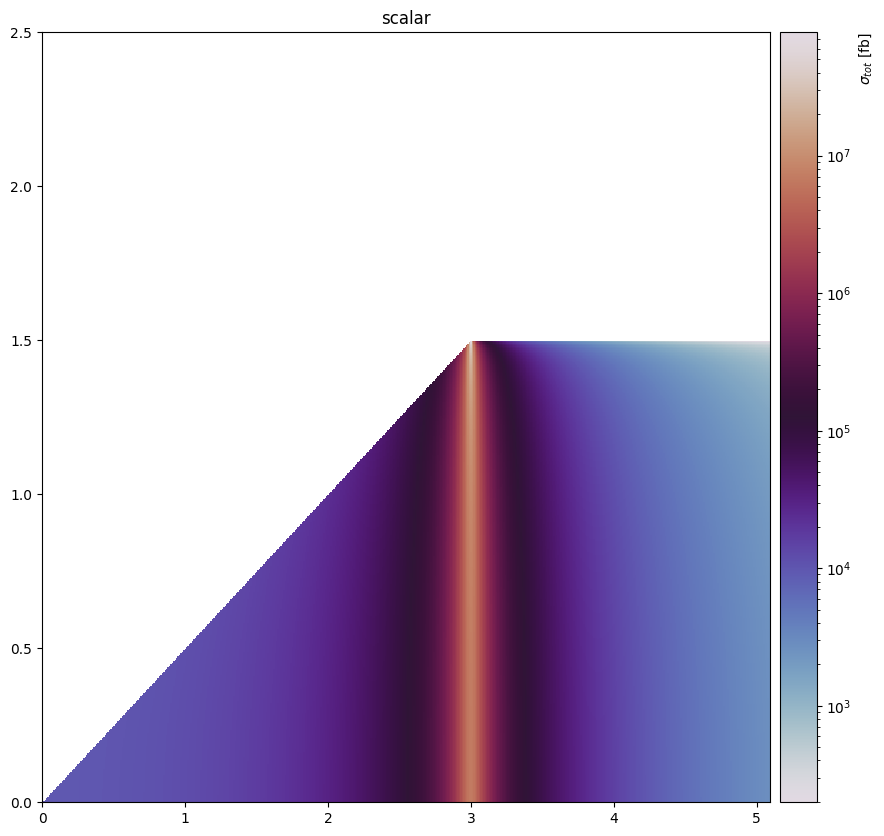

/tmp/ipykernel_1976221/2030789427.py:12: RuntimeWarning: invalid value encountered in sqrt
  return (1/16)*g_s_psi**2*np.sqrt(1 - 4*m_f**2/M_med**2)*(M_med**2 - 4*m_f**2)/(np.pi*M_med)
/tmp/ipykernel_1976221/2030789427.py:46: RuntimeWarning: invalid value encountered in sqrt
  return (1/2)*np.sqrt(-4*m_f**2 + s)*(-4*g_s_chi**2*m_f**2*(g_ps_psi**2 + g_s_psi**2) + s*(g_ps_chi**2*g_ps_psi**2 + g_ps_chi**2*g_s_psi**2 + g_ps_psi**2*g_s_chi**2 + g_s_chi**2*g_s_psi**2))/(np.sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))


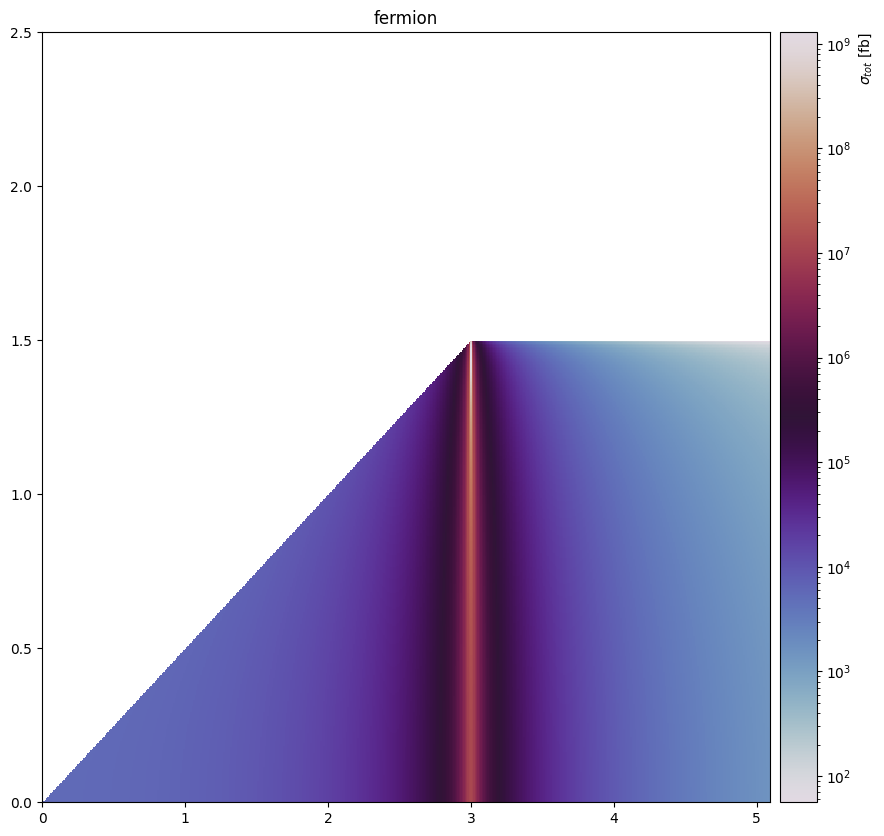

/tmp/ipykernel_1976221/2030789427.py:16: RuntimeWarning: invalid value encountered in sqrt
  return (1/64)*g_s_psi**2*np.sqrt(1 - 4*m_f**2/M_med**2)*(M_med**4 - 8*M_med**2*m_f**2 + 16*m_f**4)/(np.pi*M_med*m_f**4)
/tmp/ipykernel_1976221/2030789427.py:58: RuntimeWarning: invalid value encountered in sqrt
  return (3/4)*g_s_chi**2*(g_ps_psi**2 + g_s_psi**2)*np.sqrt(-4*m_f**2 + s)/(np.sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))


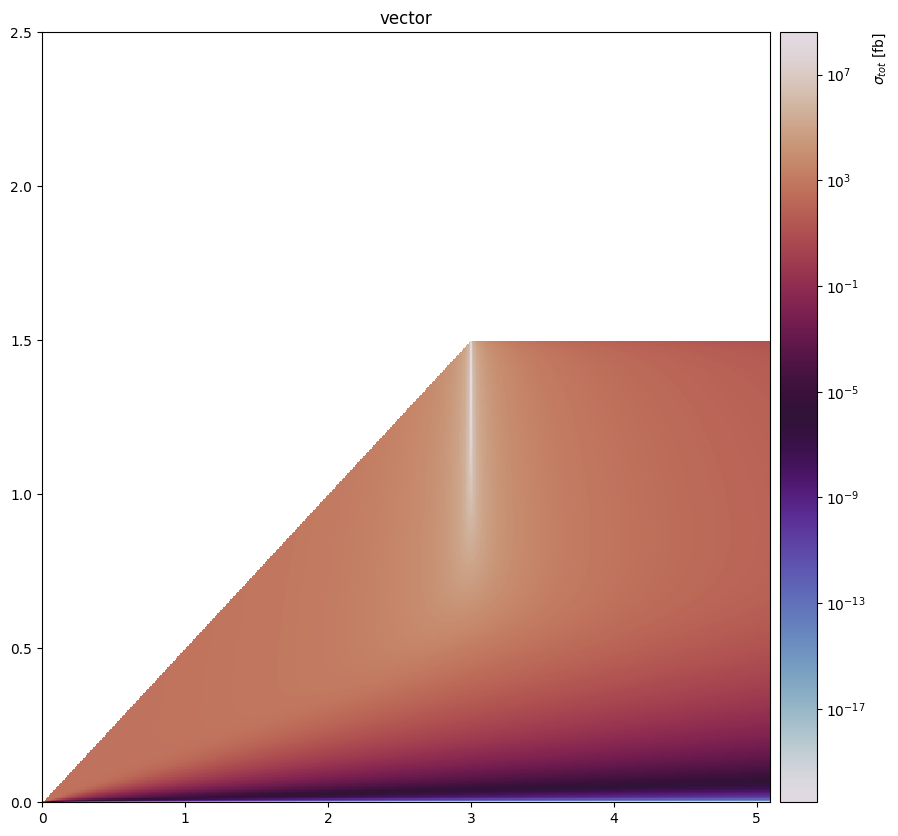

In [75]:
import matplotlib.pyplot as plt
import matplotlib.colorbar as colorb
from matplotlib import colors
from mpl_toolkits.axes_grid1 import ImageGrid



dm_types_list = ['scalar', 'fermion', 'vector']
results_dict = {}
brn = 0.3894*10**6 

def plot_simple_2d(Mmed_grid, mx_grid, results, plt_title=''):

        fig = plt.figure(figsize=(10, 10))
        ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                nrows_ncols=(1,1),
                axes_pad=(0.30, 0.0),
                share_all=True,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="5%",
                cbar_pad=0.10,
                aspect=False
                )
                        
        fsize = 10
        im = ax[0].pcolormesh(Mmed_grid, mx_grid, results, norm=colors.LogNorm(), cmap= 'twilight', rasterized=True) ## heat map of xsec
        ax[0].cax.cla()
        cb = colorb.Colorbar(ax[0].cax, im)
        cb.set_label(r'$\sigma_{tot}$ [fb]', fontsize = fsize, loc='top')  ## color bar label 
        ax[0].set_title(plt_title)
        ax[0].tick_params(axis="x")
        ax[0].set_ylim(0, 2.5)

        plt.show()


for dm_type in dm_types_list:
        
        results_dict[dm_type] = xsec_func_dict[dm_type](Mmed_grid, g_ps_psi, g_ps_chi, smax, g_s_chi, g_s_psi, mx_grid, gamma_func_dict[dm_type])
        results = results_dict[dm_type]*brn

        plot_simple_2d(Mmed_grid, mx_grid, results, plt_title = dm_type)

        